# 1. Plot Annotations

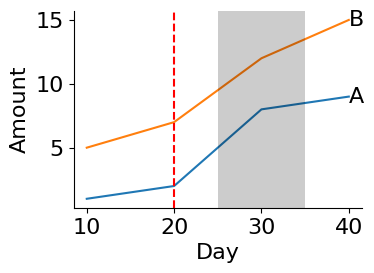

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,3), legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. replace legened with line labels
for col in df.columns:
    ax.text(df.index[-1], df[col].iat[-1], col, ha="left", va="center")

# 2. draw a vertical line at x=20
p = plt.Line2D((20,20), ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(p)

#(x1,y1), (x2,y2)   # FancyArrowPatch
#(x1,x2), (y1,y2)   # Line2D

# 3. highlight a region from x=25 to x=35
p = plt.Rectangle((25,0), 10, ax.get_ylim()[1], color="k", zorder=50, alpha=0.2, linewidth=0)
ax.add_artist(p)

# (x,y), width, height   --- Rectangle
# (x1,y1), (x2,y2)       --- later

# 2. Geographic Data/Maps

In [50]:
import pandas as pd
import geopandas as gpd

In [52]:
# .shp => Shapefile
gpd.datasets.get_path("naturalearth_lowres")

'/home/trh/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [54]:
!ls /home/trh/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [55]:
!ls /home/trh/.local/lib/python3.10/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [67]:
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

In [68]:
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [59]:
type(df).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [63]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

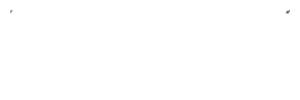

In [65]:
df["geometry"].iat[0]

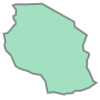

In [69]:
df["geometry"].iat[1]

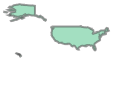

In [70]:
df.at["United States of America", "geometry"]

In [71]:
print(type(df["geometry"].iat[1]))
print(type(df.at["United States of America", "geometry"]))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>


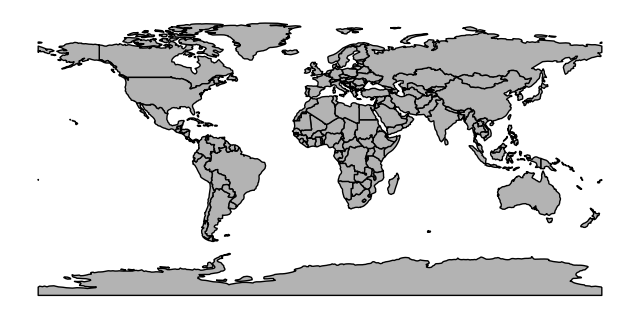

In [77]:
ax = df.plot(figsize=(8,4), facecolor="0.7", edgecolor="black")
ax.set_axis_off()

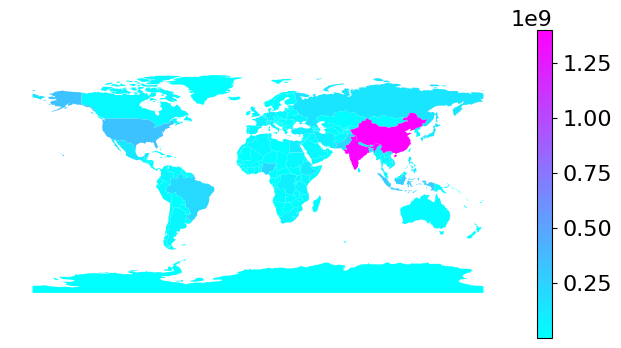

In [81]:
ax = df.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

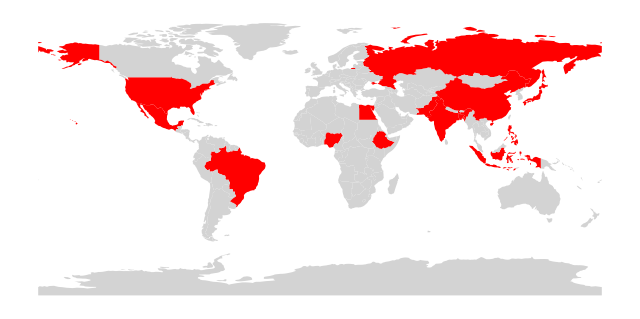

In [88]:
# create a map where countries with >100M people are red, others are gray
df["color"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "color"] = "red"
ax = df.plot(figsize=(8,4), color=df["color"])
ax.set_axis_off()

# Shapely Shapes

In [90]:
from shapely.geometry import Point, Polygon, box

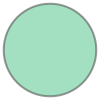

In [98]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])   # triangle
p2 = box(0,0,1,1)
p3 = Point(5,5)
p4 = p3.buffer(1)
p4

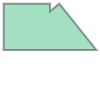

In [102]:
p1.union(p2)   # any point that is in either (OR)

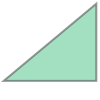

In [103]:
p1.intersection(p2)   # any point that is in both (AND)

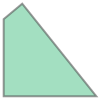

In [104]:
p1.difference(p2)   # subtraction

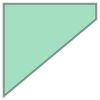

In [105]:
p2.difference(p1)   # subtraction

In [108]:
p1.intersects(p2) # do they overlap?

True

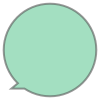

In [116]:
# is the point "near" (<6 units) the triangle?
p1.union(p3.buffer(6))

In [117]:
p1.intersects(p3.buffer(6))

True

<AxesSubplot:>

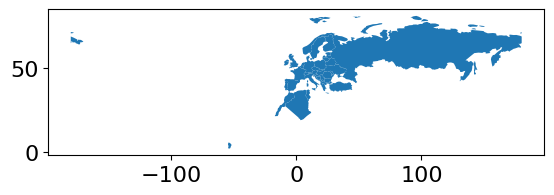

In [121]:
b = box(-10.67,34.5,31.55,71.05)

# attempt 1
df[df.intersects(b)].plot()

<AxesSubplot:>

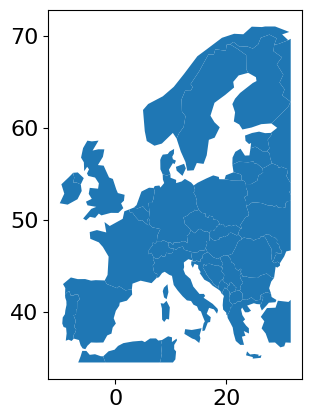

In [126]:
eur1 = df.intersection(b)
eur1.plot()

In [130]:
eur2 = eur1[~eur1.is_empty]
eur2

name
Russia              MULTIPOLYGON (((31.54002 52.74205, 31.30520 53...
Norway              POLYGON ((29.39955 69.15692, 28.59193 69.06478...
France              MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...
Tunisia             POLYGON ((8.14098 34.65515, 8.37637 35.47988, ...
Algeria             POLYGON ((-1.79299 34.52792, -2.16991 35.16840...
Sweden              POLYGON ((11.46827 59.43239, 12.30037 60.11793...
Belarus             POLYGON ((29.22951 55.91834, 29.37157 55.67009...
Ukraine             POLYGON ((30.74875 46.58310, 30.37761 46.03241...
Poland              POLYGON ((23.52754 53.47012, 23.80493 53.08973...
Austria             POLYGON ((16.90375 47.71487, 16.34058 47.71290...
Hungary             POLYGON ((22.64082 48.15024, 22.71053 47.88219...
Moldova             POLYGON ((26.85782 48.36821, 27.52254 48.46712...
Romania             POLYGON ((28.67978 45.30403, 29.14972 45.46493...
Lithuania           POLYGON ((26.58828 55.16718, 25.76843 54.84696...
Latvia         

<AxesSubplot:>

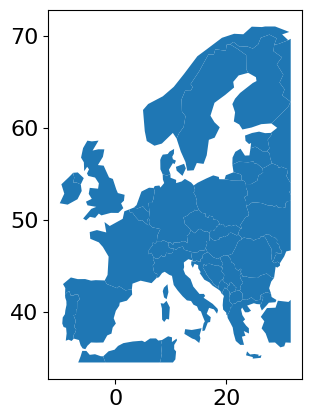

In [131]:
eur2.plot()